<a href="https://colab.research.google.com/github/Arbarbn/Fraud-Detection-Projects-using-Python/blob/main/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Fraud Detection

This is important thing to do. This help company to recognize fraudulent credit card transactions so customer feel safe because all charge are what they all purchase. 

**Content :**
dataset contains transaction made by credit cards in September 2013 by European cardholders.

This dataset presents transaction that occured in two days where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

The dataset was the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

**What we do now?** predict fraud in credit card using anomaly detection and model-based.

In [ ]:
!pip install pycaret

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Split data 
from sklearn.model_selection import train_test_split
#Anomaly detection
from sklearn.ensemble import IsolationForest
from sklearn.metrics import roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
#Sampling Method
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.metrics import classification_report_imbalanced
from collections import Counter
#Classifier 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
#XGBoost
from xgboost import XGBClassifier
#PyCaret
from pycaret.classification import *
#Neural Network
from tensorflow import keras
#color palette 
palette = ["#F8766D", "#D39200", "#93AA00", "#00BA38", "#00C19F", "#00B9E3", "#619CFF", "#DB72FB"]

plt.style.use('default')

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data Scientist/Project/Credit Card Fraud Detection/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.919560e-15,5.688174e-16,-8.769071e-15,2.782312e-15,-1.552563e-15,2.010663e-15,-1.694249e-15,-1.927028e-16,-3.137024e-15,1.768627e-15,9.170318e-16,-1.810658e-15,1.693438e-15,1.479045e-15,3.482336e-15,1.392007e-15,-7.528491e-16,4.328772e-16,9.049732e-16,5.085503e-16,1.537294e-16,7.959909e-16,5.367590e-16,4.458112e-15,1.453003e-15,1.699104e-15,-3.660161e-16,-1.206049e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [ ]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

This shows nothing null in dataset

## Exploratory Data Analysis

Checking Class distribution

In [ ]:
print("Number of normal people:", str(round(df[df.Class==0].shape[0]*100/df.shape[0],2))+"%")
print("Number of fraud people:", str(round(df[df.Class==1].shape[0]*100/df.shape[0],2))+"%")

Number of normal people: 99.83%
Number of fraud people: 0.17%


Visualization

Text(0.5, 1.0, 'Class Distribution')

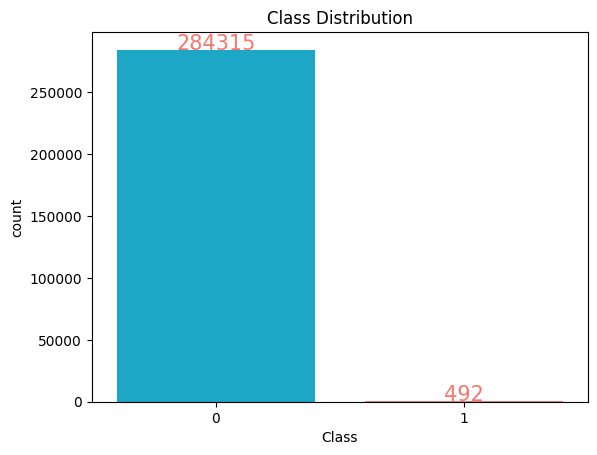

In [ ]:
ax = sns.countplot('Class', data=df, palette=[palette[5], palette[0]])
data = [df[df.Class==0].shape[0], df[df.Class==1].shape[0]]
for i in range(2):
  ax.text(i, data[i]+100, str(round(data[i],2)), fontdict=dict(color=palette[0], fontsize=15), horizontalalignment='center')
plt.title('Class Distribution')

Text(0.5, 1.0, 'Distribution of Time feature')

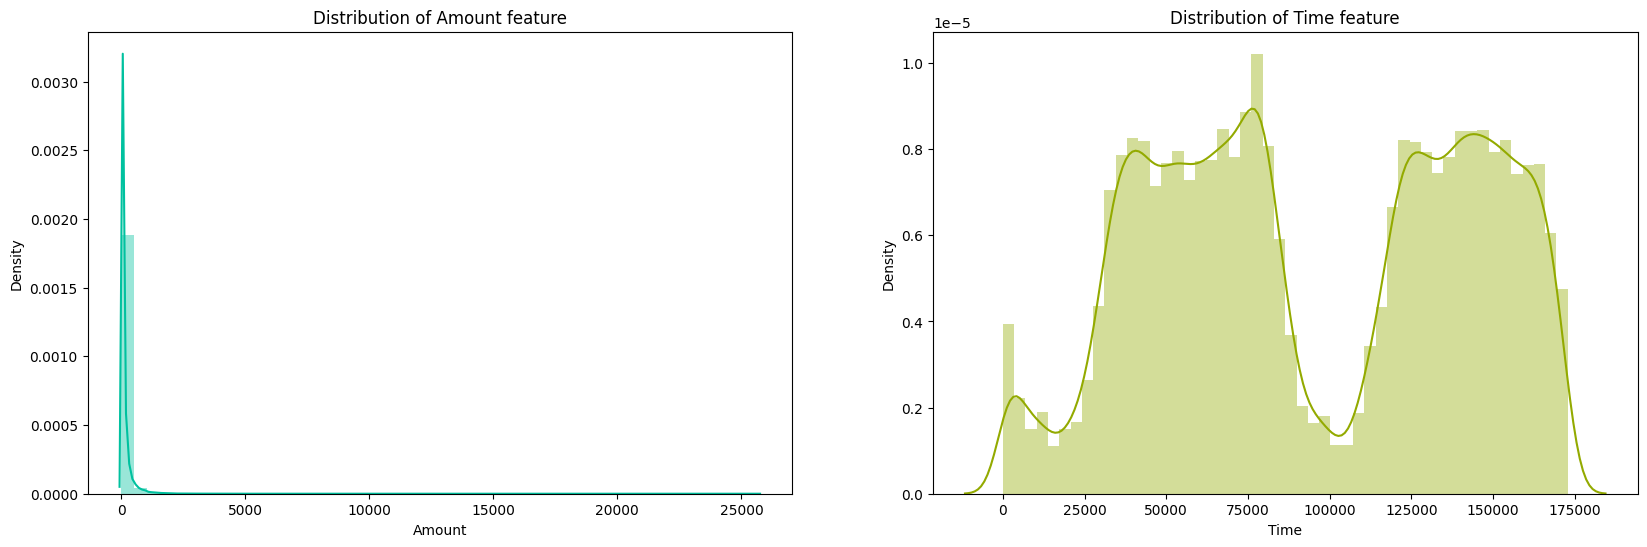

In [ ]:
f, ax=plt.subplots(1,2, figsize=(20,6))
sns.distplot(df['Amount'], ax=ax[0], color=palette[4])
ax[0].set_title('Distribution of Amount feature')

sns.distplot(df['Time'], ax=ax[1], color=palette[2])
ax[1].set_title('Distribution of Time feature')

Text(0.5, 1.0, 'Distribution of Fraud Transaction')

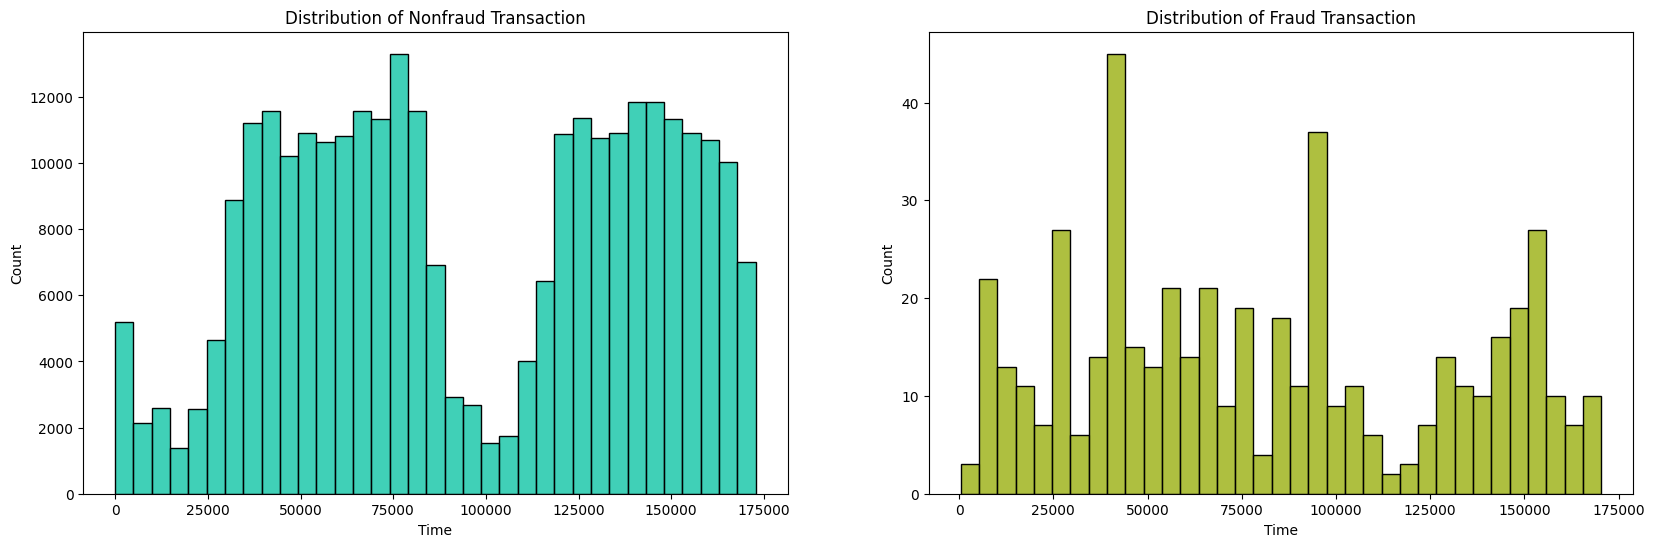

In [ ]:
f, ax=plt.subplots(1,2, figsize=(20,6))
sns.histplot(df[df.Class==0]['Time'], ax=ax[0], color=palette[4],bins=35)
ax[0].set_title('Distribution of Nonfraud Transaction')

sns.histplot(df[df.Class==1]['Time'], ax=ax[1], color=palette[2],bins=35)
ax[1].set_title('Distribution of Fraud Transaction')

These features ain't normal distribution -> skewed
Some models assume that data are normal distribution so we must use any technique to make data nearly normal distribution. 

Importance Features

In [ ]:
#Select only anonymized features
v_features = df.iloc[:, 1:29].columns
v_features

Index(['V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11',
       'V12', 'V14', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V23', 'V27',
       'Amount', 'Class'],
      dtype='object')

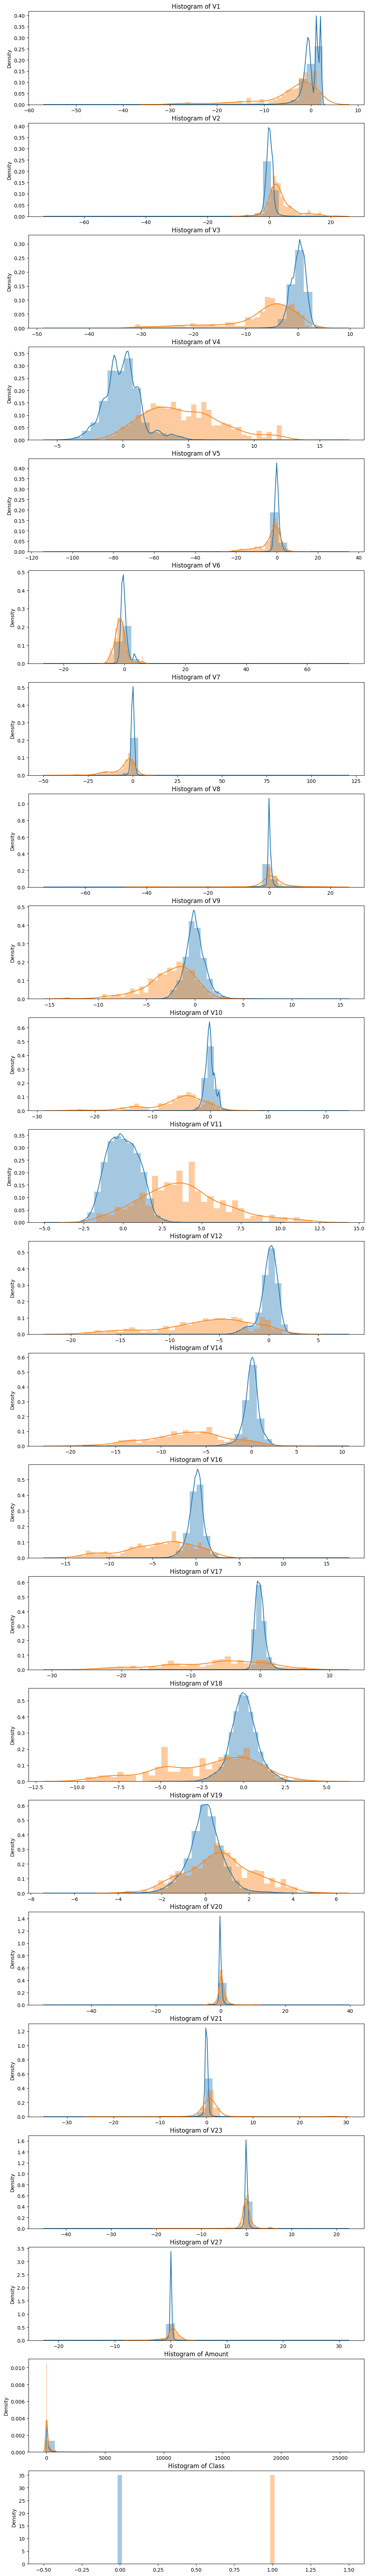

In [ ]:
from matplotlib import gridspec 
plt.figure(figsize=(12, 28*4))
gs = gridspec.GridSpec(28,1)
for i, cn in enumerate(df[v_features]):
  ax = plt.subplot(gs[i])
  sns.distplot(df[cn][df.Class==0], bins=35)
  sns.distplot(df[cn][df.Class==1], bins=35)
  ax.set_xlabel('')
  ax.set_title('Histogram of '+str(cn))
plt.show()


There are hist with nearly same between Fraud and Nonfraud, these features show can't be used to distinguish between Fraud and Nonfraud. These features are : V13, V15, V22, V24, V25, V26, V28. If we look at correlation analysis also nothing correlation. So, we can drop these features. 

In [3]:
df = df.drop(['Time','V13', 'V15', 'V22','V23', 'V24', 'V25', 'V26', 'V28', 'Amount'], axis=1)

Correlation Analysis

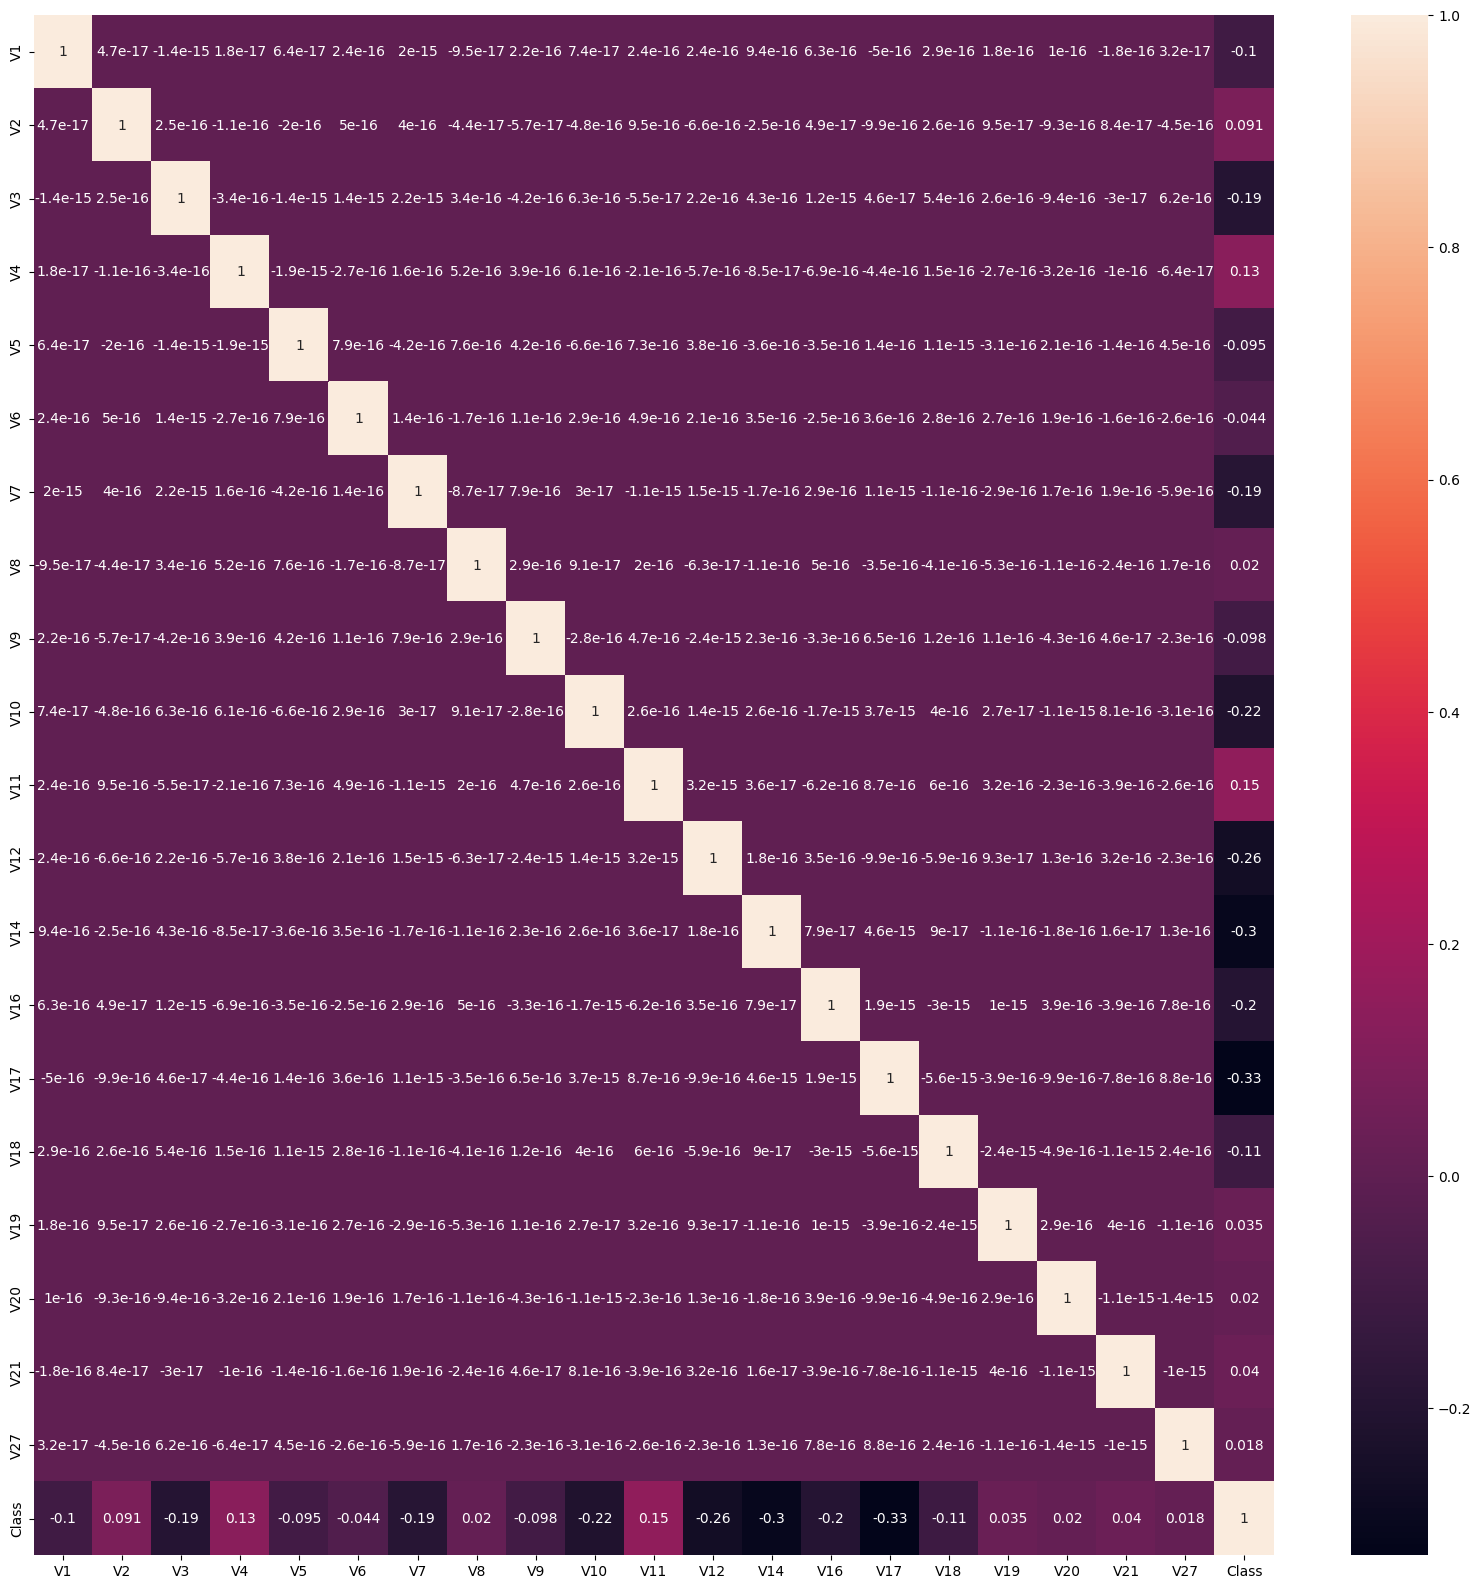

In [ ]:
plt.subplots(figsize=(20,20))
sns.heatmap(data=df.corr(), annot=True)
plt.show()

## Anomaly Detection using Isolation Forest

The Isolation Forest algorithm isolates observations by randomly selecting a feature and then randomly selecting a split value between the maximum and minimum values of the selected feature.

### Train/Test Split

In [4]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
#Making sample as training model
def sample_train(trainX, model, ensembleSize=5, sampleSize=10000): 
  modelL = []
  for n in range(ensembleSize):
    trainX = X.sample(sampleSize)
    model.fit(trainX)
    modelL.append(model)
  return modelL

In [ ]:
#Making predict for n-ensemble size
def sample_predict(testX, listmodels):
  pred = np.zeros(testX.shape[0])
  for model in listmodels:
    pred = np.add(pred, model.decision_function(testX).reshape(testX.shape[0],))
  pred = pred/len(listmodels)
  return pred

### GridSearchCV

In [ ]:
from sklearn.metrics import make_scorer, f1_score

model = IsolationForest(random_state=42, verbose=1)
param_grid = {'n_estimators':[60],
              'max_samples':[150, 140],
              'contamination':[0.01, 0.04],
              'max_features':[14, 16],
              'bootstrap':[False]}
f1_score = make_scorer(f1_score, average='micro')
grid = GridSearchCV(model, param_grid=param_grid, scoring=f1_score, cv=5, return_train_score=True)
grid.fit(X_train, y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.7s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_j

GridSearchCV(cv=5, estimator=IsolationForest(random_state=42, verbose=1),
             param_grid={'bootstrap': [False], 'contamination': [0.01, 0.04],
                         'max_features': [14, 16], 'max_samples': [150, 140],
                         'n_estimators': [60]},
             return_train_score=True,
             scoring=make_scorer(f1_score, average=micro))

In [ ]:
grid.best_params_

{'bootstrap': False,
 'contamination': 0.01,
 'max_features': 14,
 'max_samples': 150,
 'n_estimators': 60}

In [ ]:
# Using GridSearch and Hard-hand method
model = IsolationForest(random_state=42, verbose=0, bootstrap= False,  contamination= 0.01, max_features= 14, max_samples= 500, n_estimators= 100)
trainmod = sample_train(X_train, model)

In [ ]:
#decision function for class
test = sample_predict(X_test, trainmod)

In [ ]:
test = 1-test

In [ ]:
#statistics

class_test = test.copy()
class_test[test>=np.percentile(test,95)]=1 #fraud
class_test[test<np.percentile(test,95)]=0 #normal

In [ ]:
#0.905 --> base line
#bootstrap= False,  contamination= 0.01, max_features= 14, max_samples= 150, n_estimators= 60 --> improve
roc_auc_score(y_test, class_test)

0.9168349745797014

In [ ]:
print(classification_report_imbalanced(y_test, class_test))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.95      0.88      0.97      0.92      0.85     85307
          1       0.03      0.88      0.95      0.05      0.92      0.83       136

avg / total       1.00      0.95      0.88      0.97      0.92      0.85     85443



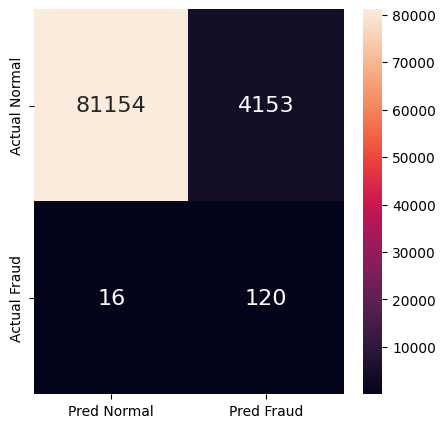

In [ ]:
cm = pd.DataFrame(confusion_matrix(y_test, class_test), ['Actual Normal', 'Actual Fraud'], ['Pred Normal', 'Pred Fraud'])
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, annot_kws={"size":16}, fmt='g')

**false positives** are very harmful because they prevent customers from using their credit cards. We get FP as much as 4153 😢😢😢😢
[FP is important in fraud card detection](https://towardsdatascience.com/precision-vs-recall-evaluating-model-performance-in-credit-card-fraud-detection-bb24958b2723)

### Extended Isolation Forest

In [ ]:
import eif

In [ ]:
model2 = eif.iForest(X_train.values, ntrees=100, sample_size=512, ExtensionLevel=12, seed=10)

In [ ]:
pred = model2.compute_paths(X_test.values)

In [ ]:
pd.DataFrame(pred).describe()

,0
count,85443.000000
mean,0.387751
std,0.048519
min,0.338031
25%,0.358797
50%,0.375237
75%,0.399591
max,0.815129


In [ ]:
class_pred = pred.copy()
class_pred[pred>=np.percentile(pred,95)]=1 #fraud
class_pred[pred<np.percentile(pred,95)]=0 #normal

In [ ]:
roc_auc_score(y_test, class_pred)

0.9278819698955812

In [ ]:
print(classification_report_imbalanced(y_test, class_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.95      0.90      0.97      0.93      0.86     85307
          1       0.03      0.90      0.95      0.06      0.93      0.86       136

avg / total       1.00      0.95      0.90      0.97      0.93      0.86     85443



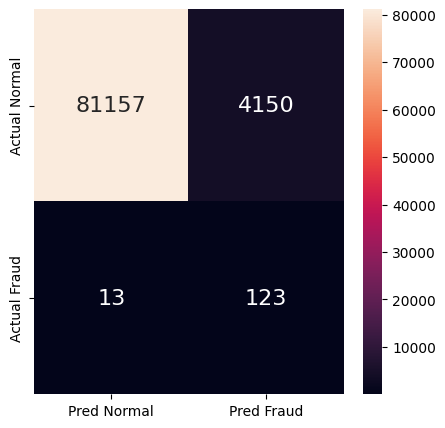

In [ ]:
cm = pd.DataFrame(confusion_matrix(y_test, class_pred), ['Actual Normal', 'Actual Fraud'], ['Pred Normal', 'Pred Fraud'])
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, annot_kws={"size":16}, fmt='g')

We get FP as much as 4150, improve 3 compare with isolation forest without extended. So, we must using other techniques to solve this problem.


## Sampling Method : Undersample

In [ ]:
# Random undersampling for normal
undersample = RandomUnderSampler(sampling_strategy='majority')
X_under, y_under = undersample.fit_resample(X_train, y_train)
print("Under: ",Counter(y_under))

Under:  Counter({0: 356, 1: 356})


In [ ]:
under_df = X_under.copy()
under_df['Class'] = y_under
under_df = under_df.sample(frac=1)

### Correlations

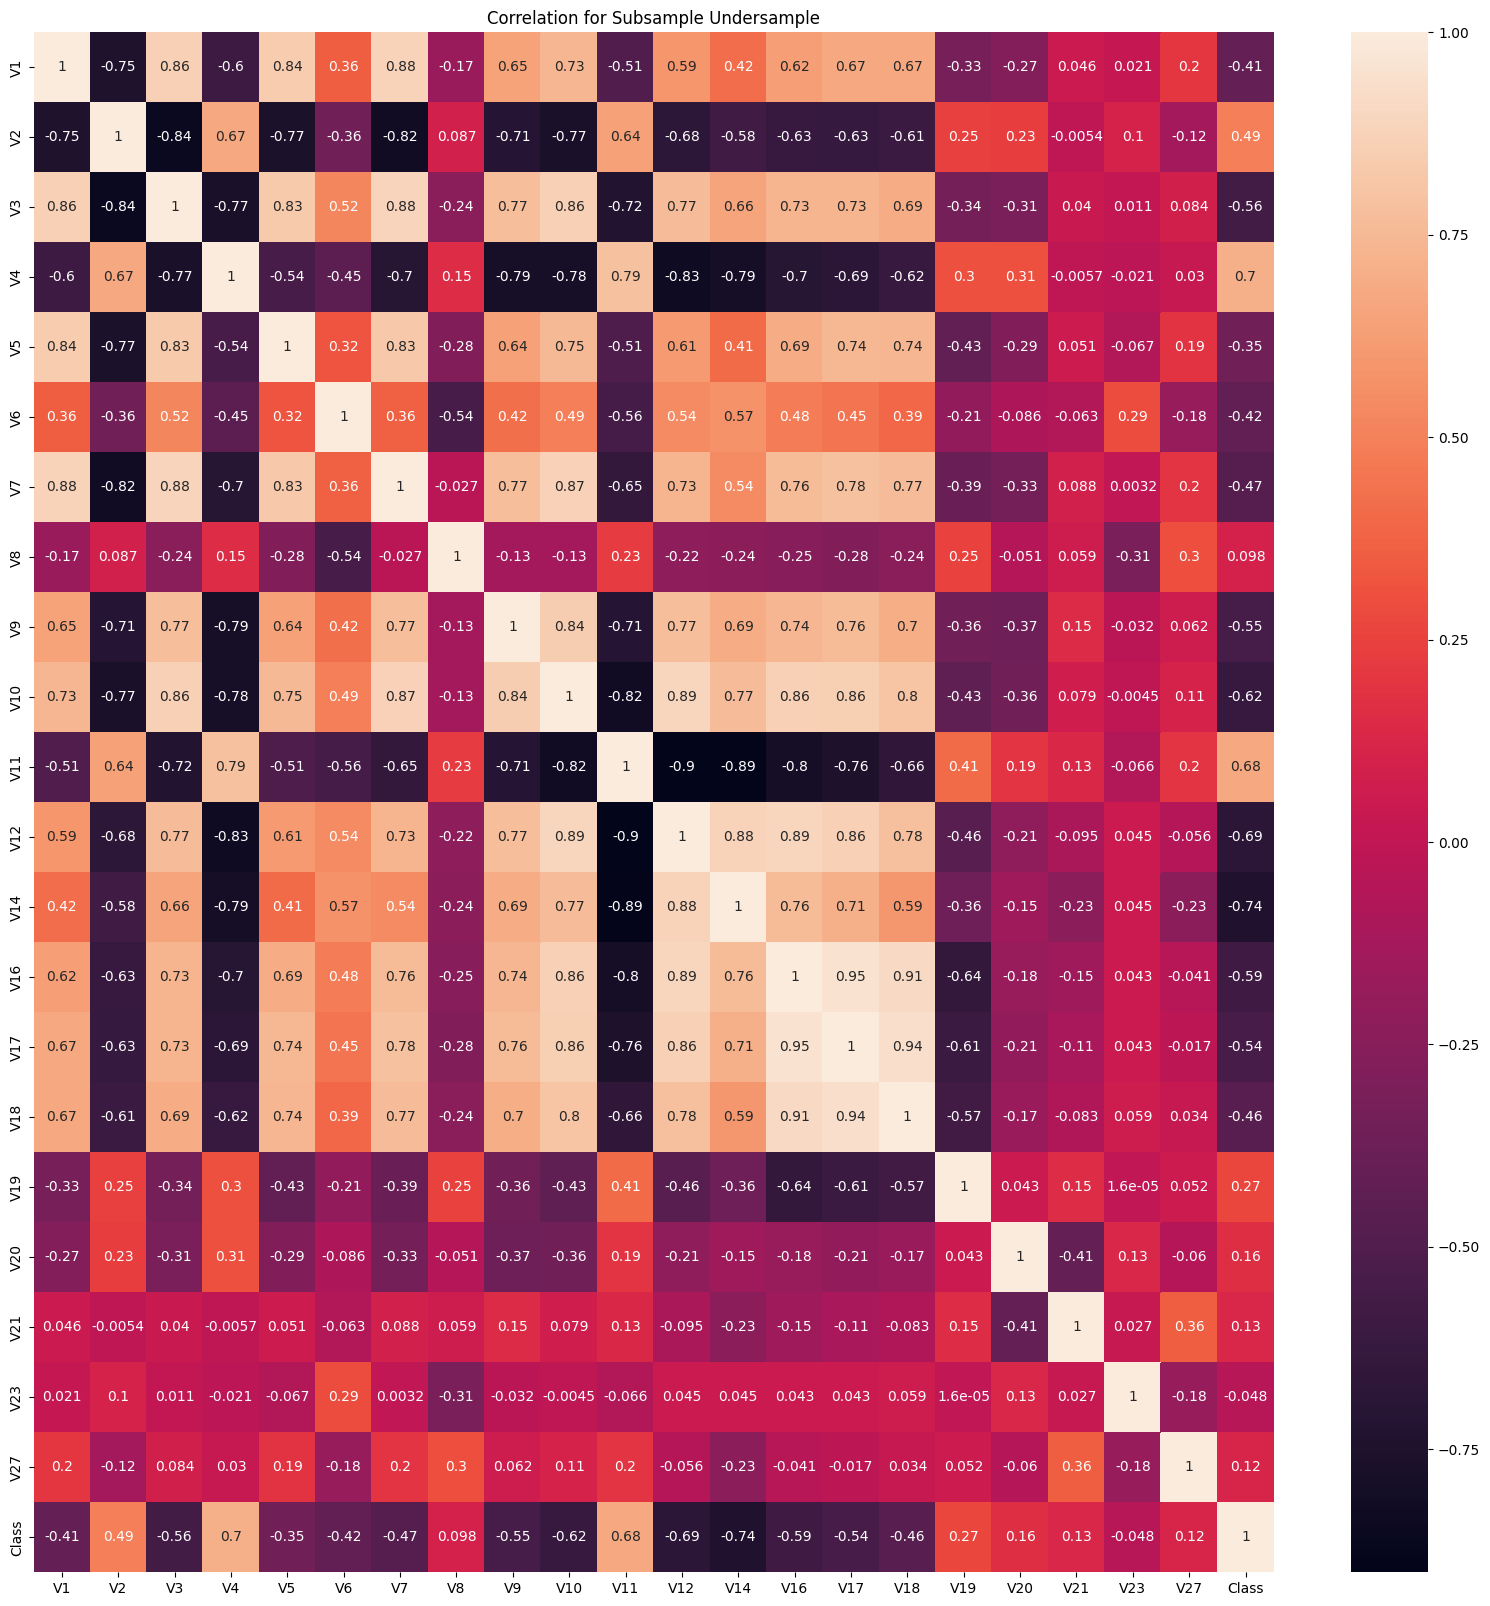

In [ ]:
plt.subplots(figsize=(20,20))
sns.heatmap(data=under_df.corr(), annot=True)
plt.title('Correlation for Subsample Undersample')
plt.show()

**Positive Correlations** : 11, 4, 2
This made possibility if higher this value, the end would result FRAUD

**Negative Correlations** : 12, 14, 10, 16, 17, 9, 3
This made possibility if lower this value, the end would result FRAUD
we just take 3 numbers to analyze the outlier

There are three features not affect the Class. so, we can drop it.

In [ ]:
under_df = under_df.drop(['V8', 'V23', 'V27'], axis=1)

### Distributions

In [ ]:
features = under_df.drop('Class', axis=1).columns

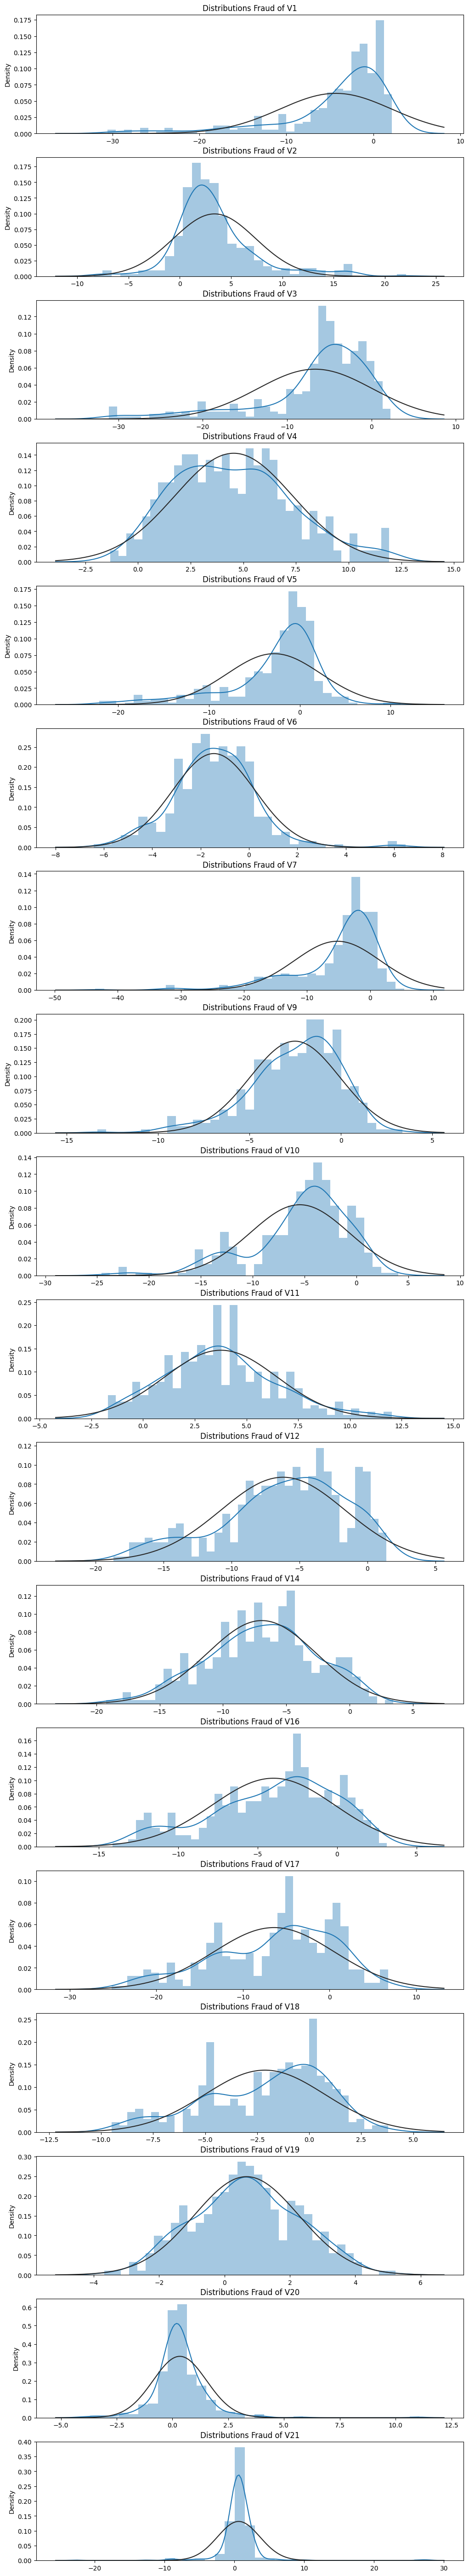

In [ ]:
from matplotlib import gridspec 
from scipy.stats import norm

plt.figure(figsize=(12, 21*4))
gs = gridspec.GridSpec(21,1)
for i, cn in enumerate(under_df[features]):
  ax = plt.subplot(gs[i])
  sns.distplot(under_df[cn][under_df.Class==1], bins=35, fit=norm)
  ax.set_xlabel('')
  ax.set_title('Distributions Fraud of '+str(cn))
plt.show()


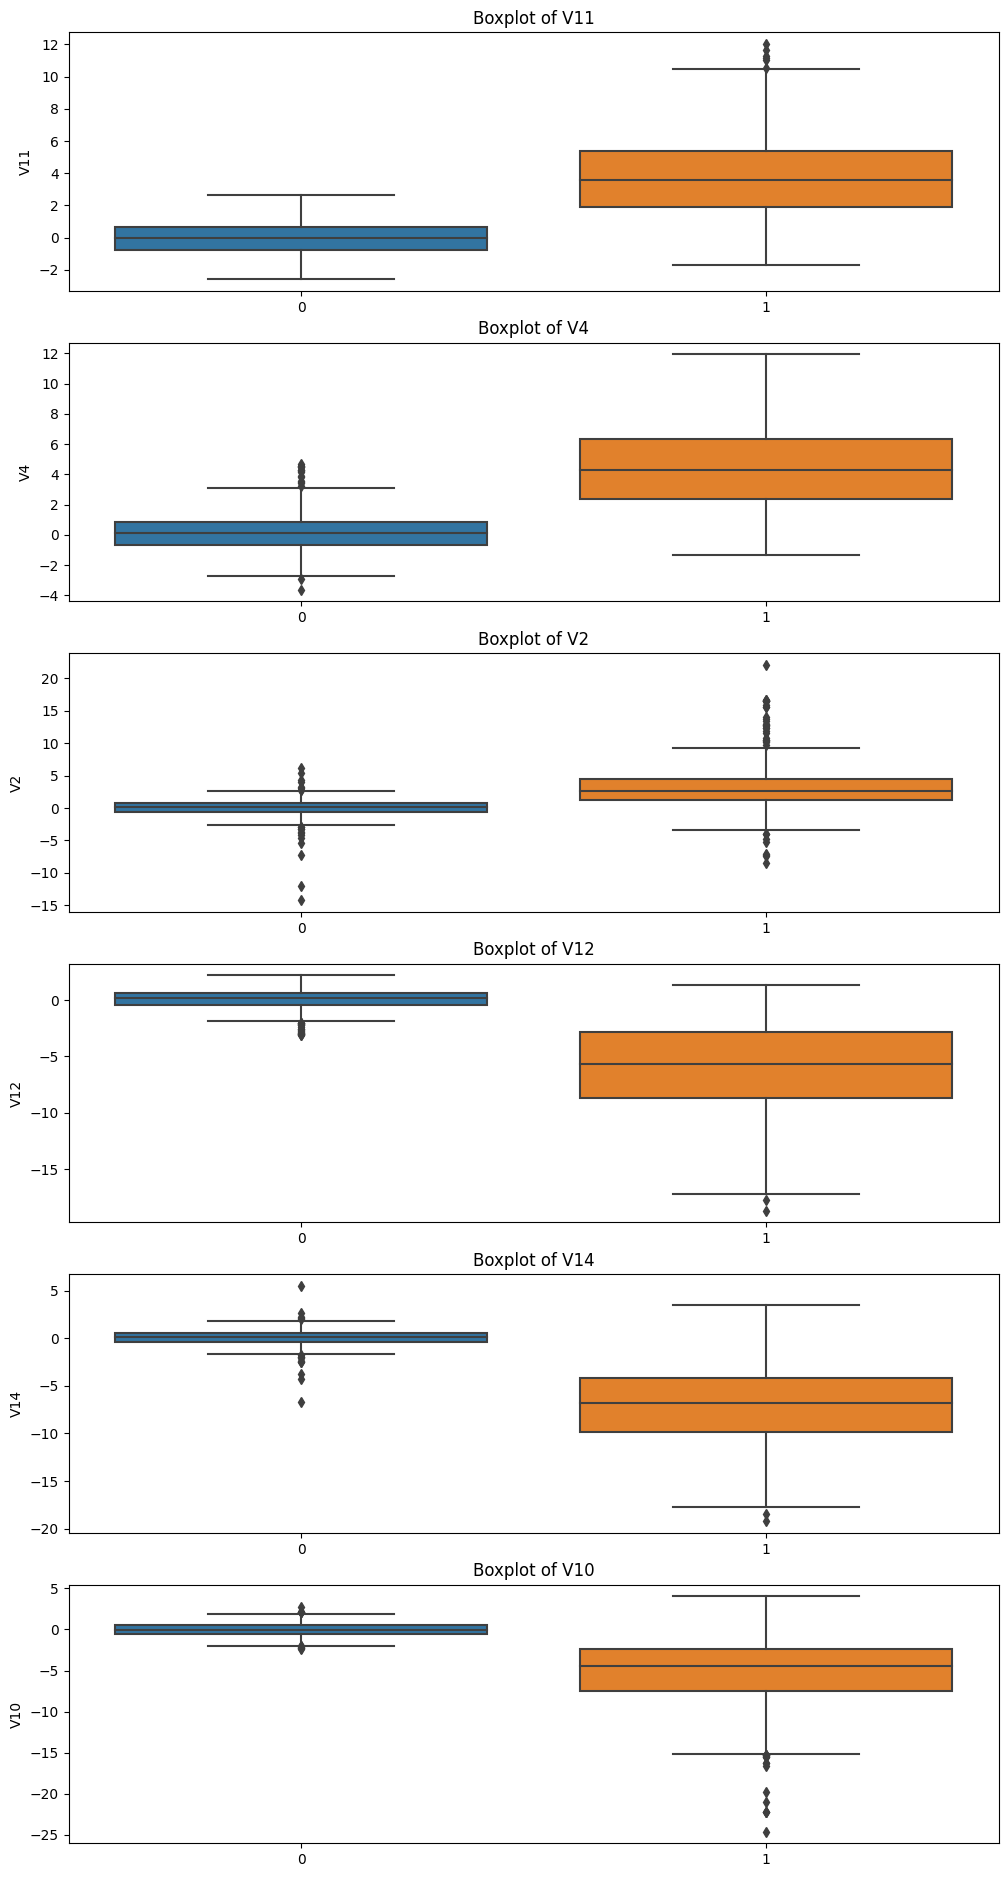

In [ ]:
higher = ['V11', 'V4', 'V2', 'V12', 'V14', 'V10']
plt.figure(figsize=(12, 21*4))
gs = gridspec.GridSpec(21,1)
for i, cn in enumerate(under_df[higher]):
  ax = plt.subplot(gs[i])
  sns.boxplot(x="Class", y=cn, data=under_df, ax=ax)
  ax.set_xlabel('')
  ax.set_title('Boxplot of '+str(cn))
plt.show()

### Outlier using IQR

In [ ]:
def outlier_fraud(label):
  fraud = under_df[label].loc[under_df.Class==1]
  q25, q75 = np.percentile(fraud, 25), np.percentile(fraud,75)
  iqr = q75-q25
  cut_off = 1.5*iqr
  lower = q25-cut_off
  upper = q75+cut_off
  return under_df[(under_df[label]>upper) | (under_df[label]<lower)]

In [ ]:
for _, cn in enumerate(under_df[higher]):
  under_df=under_df.drop(outlier_fraud(cn).index)

### Boxplot representation

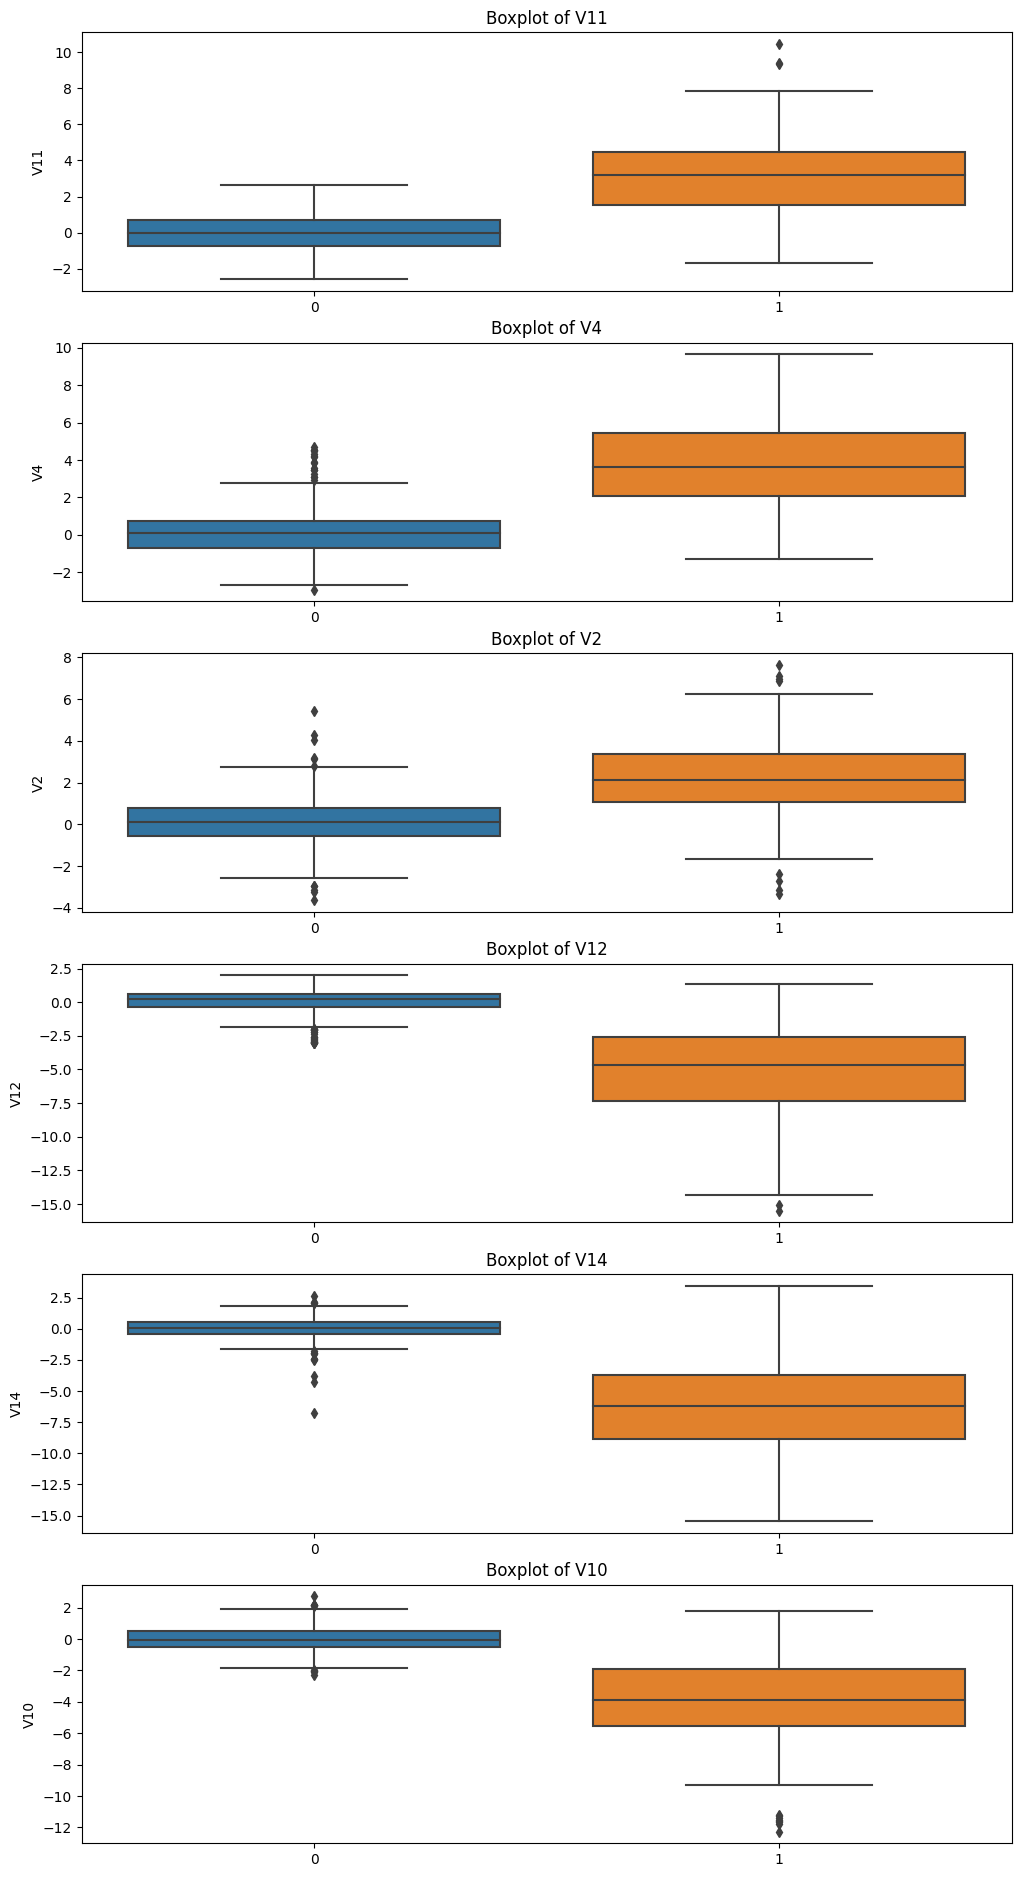

In [ ]:
plt.figure(figsize=(12, 21*4))
gs = gridspec.GridSpec(21,1)
for i, cn in enumerate(under_df[higher]):
  ax = plt.subplot(gs[i])
  sns.boxplot(x="Class", y=cn, data=under_df, ax=ax)
  ax.set_xlabel('')
  ax.set_title('Boxplot of '+str(cn))
plt.show()

In [ ]:
X_under, y_under = under_df.drop("Class", axis=1), under_df["Class"]

### t-SNE

In [ ]:
from sklearn.manifold import TSNE
import matplotlib.patches as mpatches

blue_patch = mpatches.Patch(color='#0A0AFF', label='No Fraud')
red_patch = mpatches.Patch(color='#AF0000', label='Fraud')

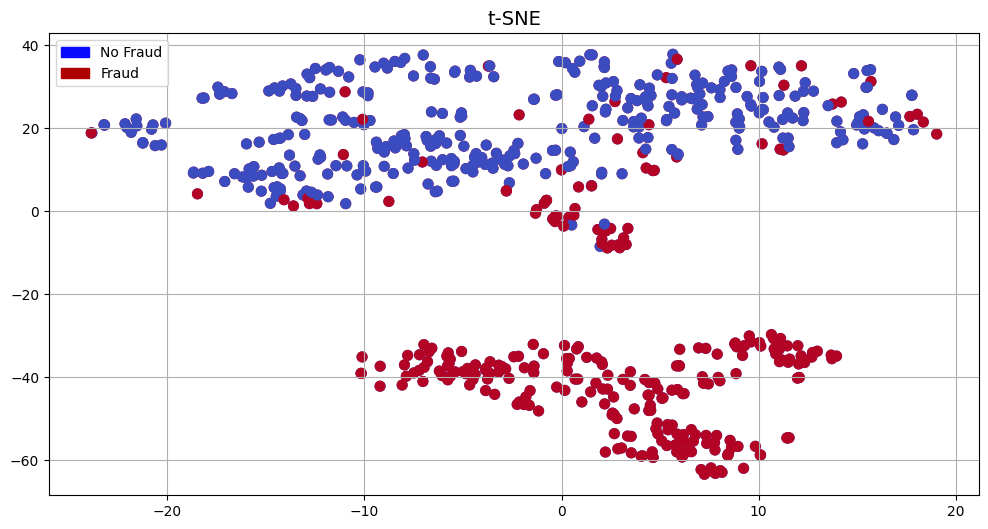

In [ ]:
f,ax = plt.subplots(figsize=(12,6))

# t-SNE scatter plot
X_tsne_under = TSNE(n_components=2, random_state=42).fit_transform(X_under.values)
ax.scatter(X_tsne_under[:,0], X_tsne_under[:,1], c=(y_under == 0), cmap='coolwarm', label='No Fraud', linewidths=2)
ax.scatter(X_tsne_under[:,0], X_tsne_under[:,1], c=(y_under == 1), cmap='coolwarm', label='Fraud', linewidths=2)
ax.set_title('t-SNE', fontsize=14)

ax.grid(True)

ax.legend(handles=[blue_patch, red_patch])

### Classifiers

In [ ]:
classifiers = {
    "Logistic Regression" :LogisticRegression(),
    "KNearest" :KNeighborsClassifier(),
    "Support Vectore Machine" : SVC(),
    "Decision Tree" : DecisionTreeClassifier(),
    "Random Forest":RandomForestClassifier()
}

In [ ]:
for _, classifier in classifiers.items():
  classifier.fit(X_under, y_under)
  training_score = cross_val_score(classifier, X_under, y_under, cv=5)
  print("Classifier -", classifier.__class__.__name__, "has training score of", round(training_score.mean()*100, 2))

Classifier - LogisticRegression has training score of 92.86
Classifier - KNeighborsClassifier has training score of 91.75
Classifier - SVC has training score of 92.54
Classifier - DecisionTreeClassifier has training score of 86.98
Classifier - RandomForestClassifier has training score of 92.54


### GridSearchCV

In [ ]:
log_params = {'penalty': ['l1', 'l2'], 'C':[0.01, 0.1, 1, 10]}
knn_params = {'n_neighbors':[2,4,5], 'algorithm': ['auto', 'kd_tree']}
svc_params = {'C':[0.5, 0.7, 0.9], 'kernel':['rbf', 'sigmoid', 'linear']}
dt_params = {'criterion': ['gini', 'enthropy'], 'max_depth':[2, 4], 'min_samples_leaf':[5,7,9]}
rf_params = {'n_estimators':[100,300], 'max_features':[10, 13, 'auto']}

grid_log = GridSearchCV(LogisticRegression(), log_params)
grid_log.fit(X_under, y_under)
grid_knn = GridSearchCV(KNeighborsClassifier(), knn_params)
grid_knn.fit(X_under, y_under)
grid_svc = GridSearchCV(SVC(), svc_params)
grid_svc.fit(X_under, y_under)
grid_dt = GridSearchCV(DecisionTreeClassifier(), dt_params)
grid_dt.fit(X_under, y_under)
grid_rf = GridSearchCV(RandomForestClassifier(), rf_params)
grid_rf.fit(X_under, y_under)

log = grid_log.best_estimator_
knn = grid_knn.best_estimator_
svc = grid_svc.best_estimator_
dt = grid_dt.best_estimator_
rf = grid_rf.best_estimator_

log_score = cross_val_score(log, X_under, y_under)
print("Classifier-Logistic Regression has training score of", str(round(log_score.mean()*100, 2))+"%")
knn_score = cross_val_score(knn, X_under, y_under)
print("Classifier-KNN has training score of", str(round(knn_score.mean()*100, 2))+"%")
svc_score = cross_val_score(svc, X_under, y_under)
print("Classifier-SVC has training score of", str(round(svc_score.mean()*100, 2))+"%")
dt_score = cross_val_score(dt, X_under, y_under)
print("Classifier-Decision Tree has training score of", str(round(dt_score.mean()*100, 2))+"%")
rf_score = cross_val_score(rf, X_under, y_under)
print("Classifier-Random Forest has training score of", str(round(rf_score.mean()*100, 2))+"%")

Classifier-Logistic Regression has training score of 92.86%
Classifier-KNN has training score of 91.9%
Classifier-SVC has training score of 92.54%
Classifier-Decision Tree has training score of 91.27%
Classifier-Random Forest has training score of 92.22%


In [ ]:
#transform to train form
X_test = X_test.drop(['V8', 'V23', 'V27'], axis=1)

### Testing Score

In [ ]:
log_pred = grid_log.predict(X_test)
knn_pred = grid_knn.predict(X_test)
svc_pred = grid_svc.predict(X_test)
dt_pred = grid_dt.predict(X_test)
rf_pred = grid_rf.predict(X_test)

print("ROC for Logistic Regression:", roc_auc_score(y_test, log_pred))
print("ROC for KNN:", roc_auc_score(y_test, knn_pred))
print("ROC for SVC:", roc_auc_score(y_test, svc_pred))
print("ROC for Decision Tree:", roc_auc_score(y_test, dt_pred))
print("ROC for Random Forest:", roc_auc_score(y_test, rf_pred))

ROC for Logistic Regression: 0.9481002093476917
ROC for KNN: 0.9379426055650905
ROC for SVC: 0.9420015614882993
ROC for Decision Tree: 0.9304183540554909
ROC for Random Forest: 0.9487523091339998


In [ ]:
print("Logistic Regression:")
print(classification_report_imbalanced(y_test, log_pred))
print("KNN:")
print(classification_report_imbalanced(y_test, knn_pred))
print("SVC:")
print(classification_report_imbalanced(y_test, svc_pred))
print("Decision Tree:")
print(classification_report_imbalanced(y_test, dt_pred))
print("Random Forest:")
print(classification_report_imbalanced(y_test, rf_pred))

Logistic Regression:
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.98      0.92      0.99      0.95      0.90     85307
          1       0.06      0.92      0.98      0.11      0.95      0.89       136

avg / total       1.00      0.98      0.92      0.99      0.95      0.90     85443

KNN:
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.99      0.89      0.99      0.94      0.89     85307
          1       0.09      0.89      0.99      0.17      0.94      0.87       136

avg / total       1.00      0.99      0.89      0.99      0.94      0.89     85443

SVC:
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      0.98      0.90      0.99      0.94      0.89     85307
          1       0.07      0.90      0.98      0.12      0.94      0.88       136

avg / total       1.00      0.98      0.90      

In this research, we got KNN Classifier in undersample as highest precision where precision correlate with number of FP. But, this is not like what we hope. 

## PyCaret (Auto ML)

In [30]:
train = X_train.copy()
train['Class'] = y_train

In [31]:
auto = setup(data=train, target='Class')

,Description,Value
0,session_id,4364
1,Target,Class
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(199364, 21)"
5,Missing Values,False
6,Numeric Features,20
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


In [32]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.9995,0.9382,0.768,0.9204,0.8359,0.8357,0.8398,54.097
et,Extra Trees Classifier,0.9995,0.9379,0.772,0.9255,0.8403,0.8400,0.8442,7.234
knn,K Neighbors Classifier,0.9994,0.9018,0.744,0.8934,0.8095,0.8092,0.8138,16.490
lda,Linear Discriminant Analysis,0.9994,0.8939,0.776,0.8666,0.8172,0.8169,0.8189,0.500
ada,Ada Boost Classifier,0.9992,0.9641,0.708,0.8216,0.7590,0.7586,0.7615,16.342
gbc,Gradient Boosting Classifier,0.9992,0.8044,0.644,0.8562,0.7317,0.7312,0.7404,84.018
lr,Logistic Regression,0.9991,0.9714,0.600,0.8762,0.7083,0.7079,0.7225,1.019
svm,SVM - Linear Kernel,0.9991,0.0000,0.572,0.8545,0.6794,0.6790,0.6955,0.258
dt,Decision Tree Classifier,0.9990,0.8637,0.728,0.7148,0.7188,0.7183,0.7196,4.188
ridge,Ridge Classifier,0.9988,0.0000,0.388,0.8446,0.5238,0.5232,0.5669,0.105


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=4364, verbose=0,
                       warm_start=False)

In [33]:
random_forest = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9995,0.9381,0.7600,0.9500,0.8444,0.8442,0.8495
1,0.9996,0.9794,0.8800,0.9167,0.8980,0.8978,0.8980
2,0.9992,0.8763,0.6800,0.8500,0.7556,0.7552,0.7599
3,0.9996,0.8773,0.7600,1.0000,0.8636,0.8634,0.8716
4,0.9996,0.9589,0.8400,0.9130,0.8750,0.8748,0.8755
5,0.9996,0.9583,0.8000,0.9524,0.8696,0.8694,0.8727
6,0.9994,0.9785,0.7600,0.9048,0.8261,0.8258,0.8290
7,0.9994,0.9385,0.6800,0.9444,0.7907,0.7904,0.8011
8,0.9991,0.9382,0.6800,0.7727,0.7234,0.7229,0.7244
9,0.9997,0.9386,0.8400,1.0000,0.9130,0.9129,0.9164


In [42]:
random_forest = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1455, verbose=0,
                       warm_start=False)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=-1, oob_score=False, random_state=1455, verbose=0,
                       warm_start=False)

In [ ]:
tuned_model= tune_model(random_forest, optimize='Kappa')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9994,0.9303,0.7941,0.8438,0.8182,0.8179,0.8183
1,0.9995,0.9951,0.8824,0.8333,0.8571,0.8569,0.8572
2,0.9994,0.9817,0.7941,0.8710,0.8308,0.8305,0.8314
3,0.9990,0.9672,0.7353,0.6944,0.7143,0.7138,0.7141
4,0.9991,0.9559,0.7879,0.7222,0.7536,0.7532,0.7539
5,0.9992,0.9799,0.7576,0.7812,0.7692,0.7689,0.7689
6,0.9991,0.9987,0.7273,0.7500,0.7385,0.7380,0.7381
7,0.9994,0.9831,0.8788,0.8056,0.8406,0.8403,0.8411
8,0.9994,0.9781,0.9091,0.7895,0.8451,0.8448,0.8469
9,0.9995,0.9973,0.9697,0.7805,0.8649,0.8646,0.8697


In [43]:
pred = predict_model(random_forest, data= X_test)

In [44]:
print("ROC for Auto RF:", roc_auc_score(y_test, pred['Label']))

ROC for Auto RF: 0.9006884046478498


In [45]:
print("Auto RF:")
print(classification_report_imbalanced(y_test, pred['Label']))

Auto RF:
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.80      1.00      0.90      0.82     85307
          1       0.93      0.80      1.00      0.86      0.90      0.79       136

avg / total       1.00      1.00      0.80      1.00      0.90      0.82     85443



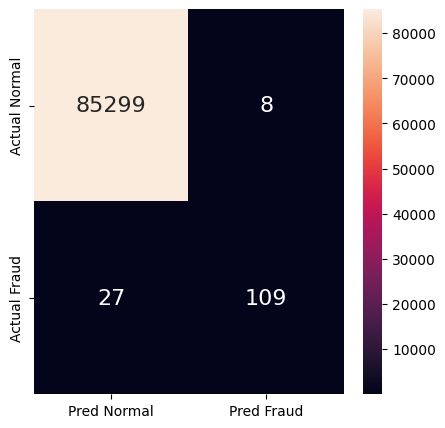

In [46]:
cm = pd.DataFrame(confusion_matrix(y_test, pred['Label']), ['Actual Normal', 'Actual Fraud'], ['Pred Normal', 'Pred Fraud'])
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, annot_kws={"size":16}, fmt='g')

Using Random forest pycaret, we get 8 as FP. This is very good. ⏫

## XGBOOST

In [6]:
model_xgb = XGBClassifier(random_state=1155)
model_xgb.fit(X_train, y_train)

XGBClassifier(random_state=1155)

In [48]:
predy = model_xgb.predict(X_test)

In [49]:
print("ROC for base-XGBOOST:", roc_auc_score(y_test, predy))

ROC for base-XGBOOST: 0.9153708422658923


In [50]:
print("Base XGBOOST:")
print(classification_report_imbalanced(y_test, predy))

Base XGBOOST:
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.83      1.00      0.91      0.84     85307
          1       0.90      0.83      1.00      0.87      0.91      0.82       136

avg / total       1.00      1.00      0.83      1.00      0.91      0.84     85443



### GridSearchCV

In [7]:
xgb_params = {'gamma': [0, 0.5],
              'min_child_weight': [1, 3],
              'subsample':[1, 3],
              'colsample_bytree':[1, 2],
              'max_depth': [3, 5],
              'n_estimators':[100, 200]}
gridxgb = GridSearchCV(model_xgb, xgb_params, cv=5)
gridxgb.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=XGBClassifier(random_state=1155),
             param_grid={'colsample_bytree': [1, 2], 'gamma': [0, 0.5],
                         'max_depth': [3, 5], 'min_child_weight': [1, 3],
                         'n_estimators': [100, 200], 'subsample': [1, 3]})

In [8]:
testy = gridxgb.predict(X_test)

In [9]:
print("ROC for base-XGBOOST:", roc_auc_score(y_test, testy))

ROC for base-XGBOOST: 0.908064790559219


In [10]:
print("Base XGBOOST:")
print(classification_report_imbalanced(y_test, testy))

Base XGBOOST:
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.82      1.00      0.90      0.83     85307
          1       0.97      0.82      1.00      0.88      0.90      0.80       136

avg / total       1.00      1.00      0.82      1.00      0.90      0.83     85443



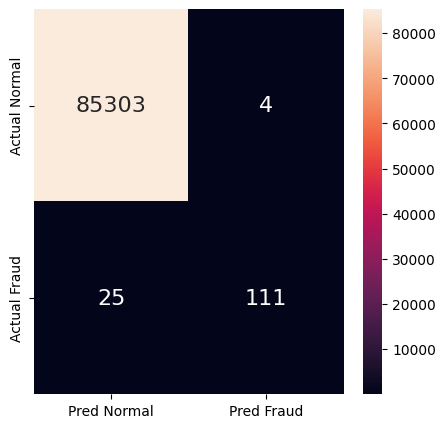

In [11]:
cm = pd.DataFrame(confusion_matrix(y_test, testy), ['Actual Normal', 'Actual Fraud'], ['Pred Normal', 'Pred Fraud'])
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, annot_kws={"size":16}, fmt='g')

Now, we get FP only 4. 

## ANN

In [35]:
#using trial-error parameters
model_nn = keras.Sequential([
            keras.layers.Dense(256, activation='relu', input_shape=(X_train.shape[-1],)),
            keras.layers.BatchNormalization(),
            keras.layers.Dropout(0.3),
            keras.layers.Dense(128, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.Dropout(0.3),
            keras.layers.Dense(64, activation='relu'),
            keras.layers.BatchNormalization(),
            keras.layers.Dropout(0.3),
            keras.layers.Dense(1, activation='sigmoid')
])
model_nn.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=keras.metrics.Precision(name='precision'))
history = model_nn.fit(X_train, y_train, validation_data=(X_test, y_test), batch_size=512, epochs=66)

Epoch 1/66
390/390 [==============================] - 4s 8ms/step - loss: 0.0350 - precision: 0.1108 - val_loss: 0.0045 - val_precision: 0.8864
Epoch 2/66
390/390 [==============================] - 3s 7ms/step - loss: 0.0048 - precision: 0.8538 - val_loss: 0.0035 - val_precision: 0.8595
Epoch 3/66
390/390 [==============================] - 3s 7ms/step - loss: 0.0042 - precision: 0.8403 - val_loss: 0.0032 - val_precision: 0.8594
Epoch 4/66
390/390 [==============================] - 3s 7ms/step - loss: 0.0040 - precision: 0.8630 - val_loss: 0.0029 - val_precision: 0.8661
Epoch 5/66
390/390 [==============================] - 3s 7ms/step - loss: 0.0038 - precision: 0.8511 - val_loss: 0.0029 - val_precision: 0.7943
Epoch 6/66
390/390 [==============================] - 2s 6ms/step - loss: 0.0037 - precision: 0.8592 - val_loss: 0.0026 - val_precision: 0.8527
Epoch 7/66
390/390 [==============================] - 2s 6ms/step - loss: 0.0036 - precision: 0.8625 - val_loss: 0.0028 - val_precision:

### Plot 

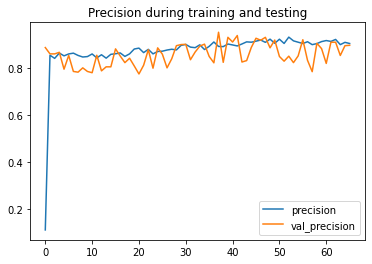

In [36]:
plt.plot(history.history['precision'], label='precision')
plt.plot(history.history['val_precision'], label='val_precision')
plt.title('Precision during training and testing')
plt.legend()

In [37]:
pred_ann = model_nn.predict(X_test)

In [38]:
print("ROC for ANN:", roc_auc_score(y_test, pred_ann.round()))

ROC for ANN: 0.9116885104939323


In [31]:
print("ANN:")
print(classification_report_imbalanced(y_test, pred_ann.round()))

ANN:
                   pre       rec       spe        f1       geo       iba       sup

          0       1.00      1.00      0.82      1.00      0.91      0.84     85307
          1       0.90      0.82      1.00      0.86      0.91      0.81       136

avg / total       1.00      1.00      0.82      1.00      0.91      0.84     85443



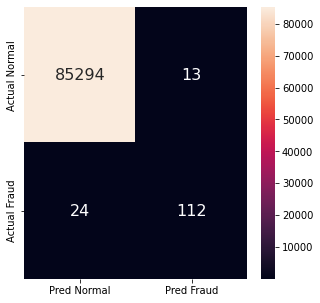

In [32]:
cm = pd.DataFrame(confusion_matrix(y_test, pred_ann.round()), ['Actual Normal', 'Actual Fraud'], ['Pred Normal', 'Pred Fraud'])
plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, annot_kws={"size":16}, fmt='g')

**Conclusion** ⏫
We get XGBOOST as best classifier with only FP 4 with precision for detect Fraud is 0.97. 🙂😉